<a href="https://colab.research.google.com/github/Nagendrakoteru/dsml_sept/blob/main/Business_Case_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!wget "https://drive.usercontent.google.com/download?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i&export=download" -O "Yulu.csv"

--2024-05-28 05:43:58--  https://drive.usercontent.google.com/download?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [application/octet-stream]
Saving to: ‘Yulu.csv’

Yulu.csv            100%[===================>] 633.16K  --.-KB/s    in 0.08s   

2024-05-28 05:43:59 (7.59 MB/s) - ‘Yulu.csv’ saved [648353/648353]



#1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.
##a. Examine dataset structure, characteristics, and statistical summary.

In [3]:
yulu=pd.read_csv("Yulu.csv")

In [4]:
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
yulu['datetime']=pd.to_datetime(yulu['datetime'])

In [7]:
yulu.shape

(10886, 12)

In [8]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
yulu.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454




1.   we have 10886 rows of data with 12 columns
2.   Highest temparature 41 and lowest Temperature 0.82
3.   Humidity with 0% to 100%
4.   Windspeed with maximum of 56.99 ~57
5.   Maximum registered Persons in a hour are 886




In [10]:
yulu['datetime'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int32

In [11]:
yulu['date']=yulu['datetime'].dt.date
yulu['Month']=yulu['datetime'].dt.month
yulu['Year']=yulu['datetime'].dt.year
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,Month,Year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,2011


##b. Identify missing values and perform Imputation using an appropriate method.

###Insight: We don't have any null or blank values in the dataset.

In [12]:
yulu.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
Month         0
Year          0
dtype: int64

In [13]:
#c. Identify and remove duplicate records.
#Insight: we don't have any duplicated columns in the dataset.
yulu.duplicated().sum()

0

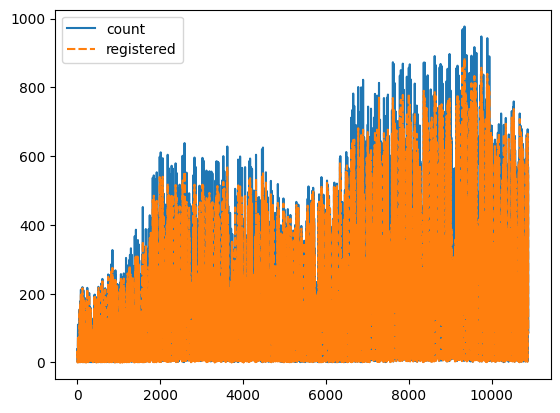

In [14]:

sns.lineplot(data=yulu[['date','count','registered']],estimator=np.sum)
plt.show()

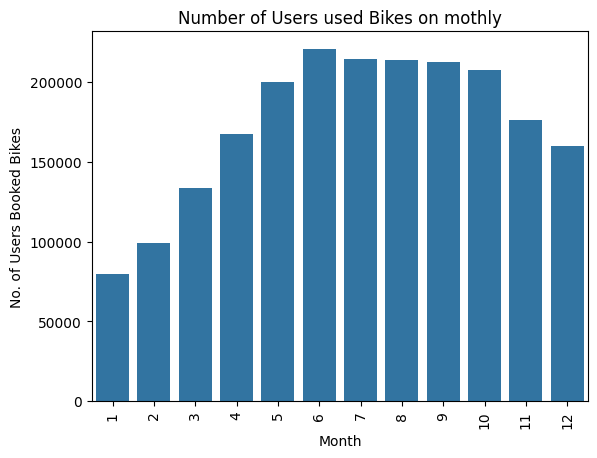

In [15]:
groupedData=yulu[['Month','count']].groupby(by=['Month'],sort=True).sum()
groupedData=groupedData.reset_index()
sns.barplot(data=groupedData,x='Month',y='count')
plt.xticks(rotation=90)
plt.title("Number of Users used Bikes on mothly")
plt.ylabel("No. of Users Booked Bikes")
plt.show()

Registring for bikes has been increased in working days for first 3 seasons and reduced in 4th Season.

For Holidays it is increased maintained constantly.

No. of Registered and Used users are slightly same. looks like there is difference of ~10%

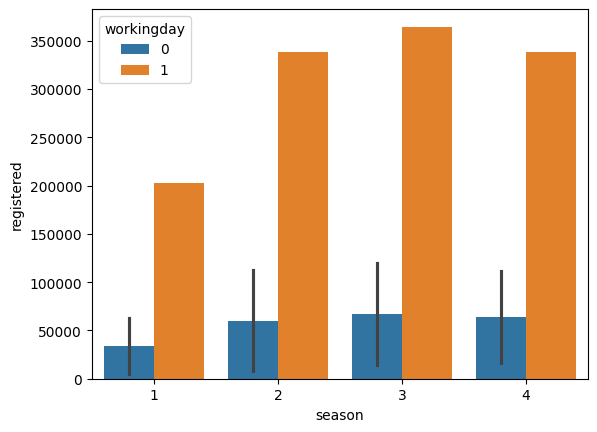

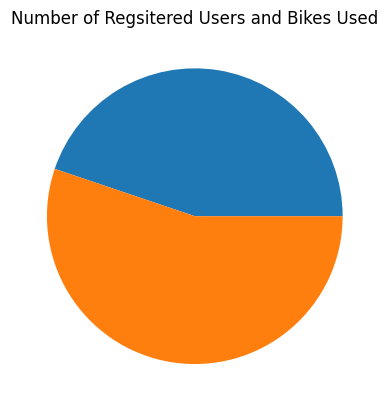

In [16]:
data=yulu[['season','holiday','workingday','registered','count']].groupby(by=['season','holiday','workingday']).sum(['registered','count']).reset_index()
sns.barplot(data=data,x='season',y='registered',hue='workingday')
plt.show()
plt.pie(data[['registered','count']].sum())
plt.title("Number of Regsitered Users and Bikes Used")
plt.show()



In [17]:
seasons=yulu[['season','registered','count','temp']].groupby(by=['temp','season']).sum(['count','registered']).reset_index()
seasons.head()

,temp,season,registered,count
0,0.82,1,538,544
1,1.64,1,176,183
2,2.46,1,204,215
3,3.28,1,203,212
4,4.10,1,2160,2212


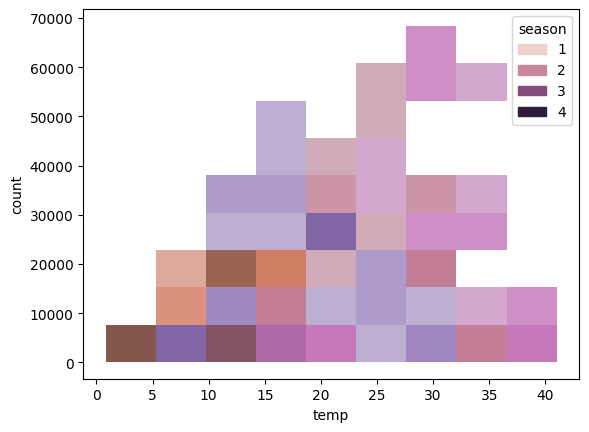

In [18]:
sns.histplot(data=seasons,x='temp',y='count',hue='season')
plt.show()

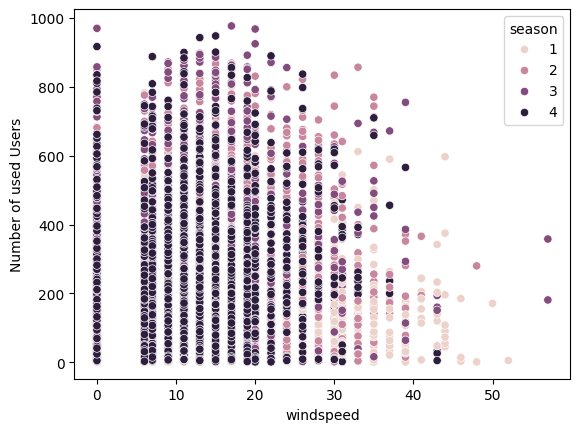

In [19]:
sns.scatterplot(data=yulu,x='windspeed',y='count',hue='season')
plt.ylabel("Number of used Users")
plt.show()

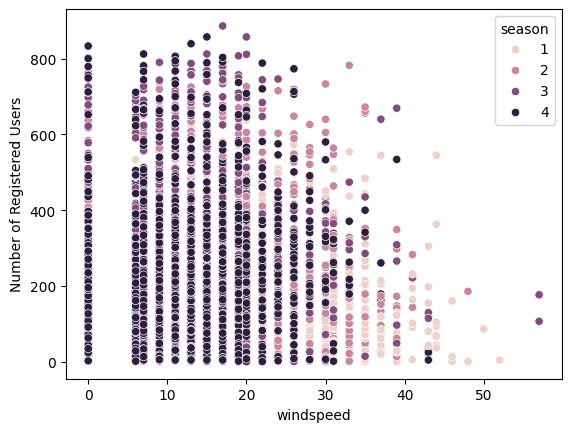

In [20]:
sns.scatterplot(data=yulu,x='windspeed',y='registered',hue='season')
plt.ylabel("Number of Registered Users")
plt.show()

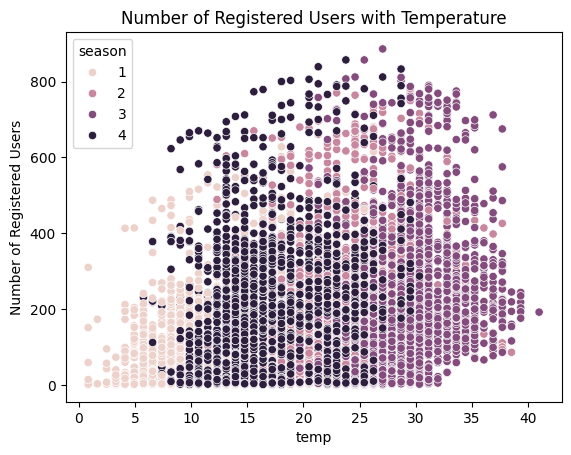

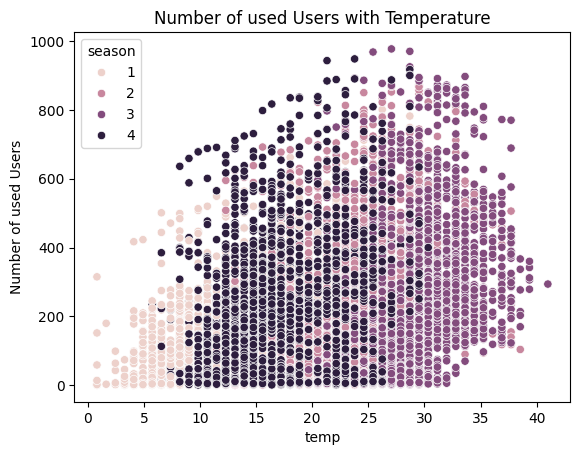

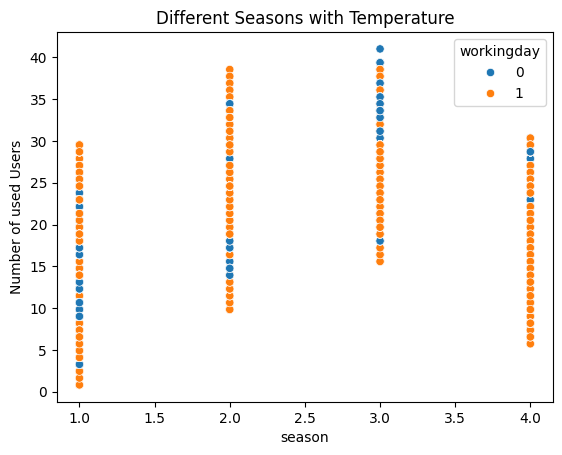

In [21]:
sns.scatterplot(data=yulu,x='temp',y='registered',hue='season')
plt.ylabel("Number of Registered Users")
plt.title("Number of Registered Users with Temperature")
plt.show()

sns.scatterplot(data=yulu,x='temp',y='count',hue='season')
plt.ylabel("Number of used Users")
plt.title("Number of used Users with Temperature")
plt.show()

sns.scatterplot(data=yulu,y='temp',x='season',hue='workingday')
plt.ylabel("Number of used Users")
plt.title("Different Seasons with Temperature")
plt.show()

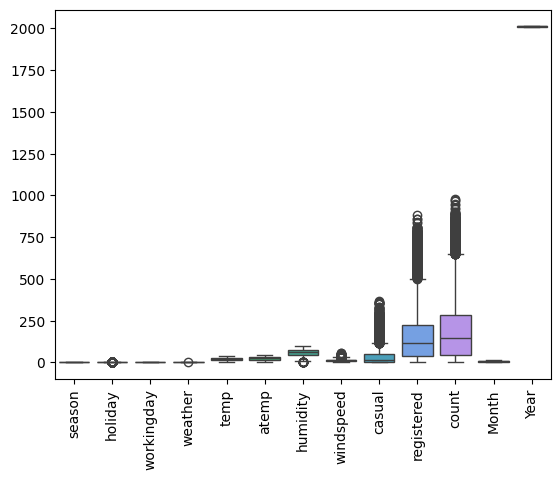

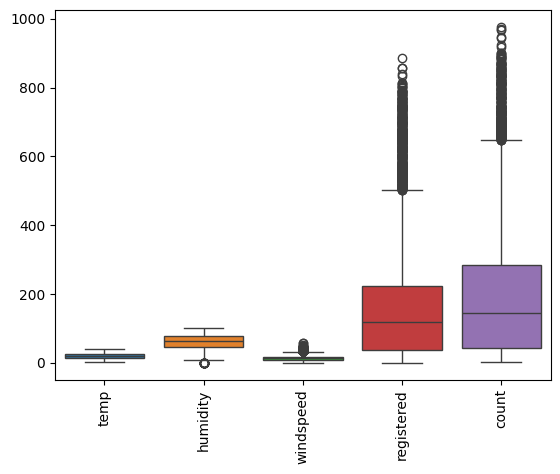

In [22]:
#Hint: There are many outliers in registered and count users followed by casual, windspeed and humidity.

sns.boxplot(data=yulu)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=yulu[['temp','humidity','windspeed','registered','count']])
plt.xticks(rotation=90)
plt.show()


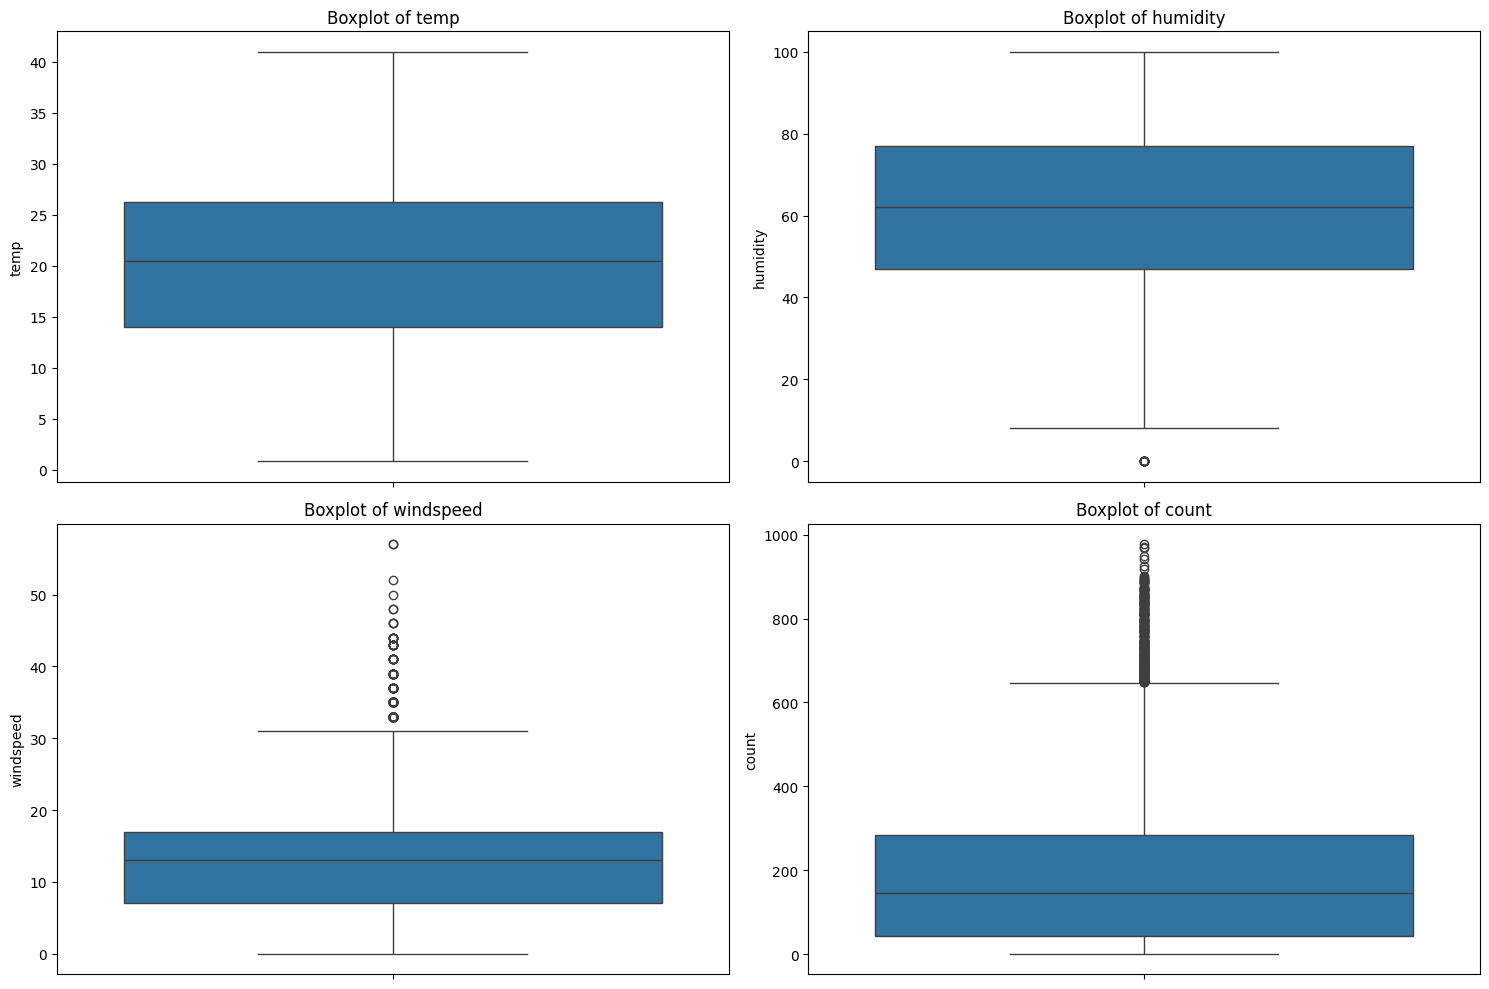

In [23]:
numericColumns = ['temp', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(15, 10))

for i, column in enumerate(numericColumns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=yulu[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [24]:
def handleOutliers(df,columnName):
  q1=df[columnName].quantile(0.25)
  q3=df[columnName].quantile(0.75)
  iqr=q3-q1

  lowerBound=q1-1.5*iqr
  upperBound=q3+1.5*iqr
  df[columnName]=np.where(df[columnName]<lowerBound,lowerBound,df[columnName])
  df[columnName]=np.where(df[columnName]>upperBound,upperBound,df[columnName])

  return df


In [25]:

data=yulu.copy()

for columnName in numericColumns:
  data=handleOutliers(data,columnName)

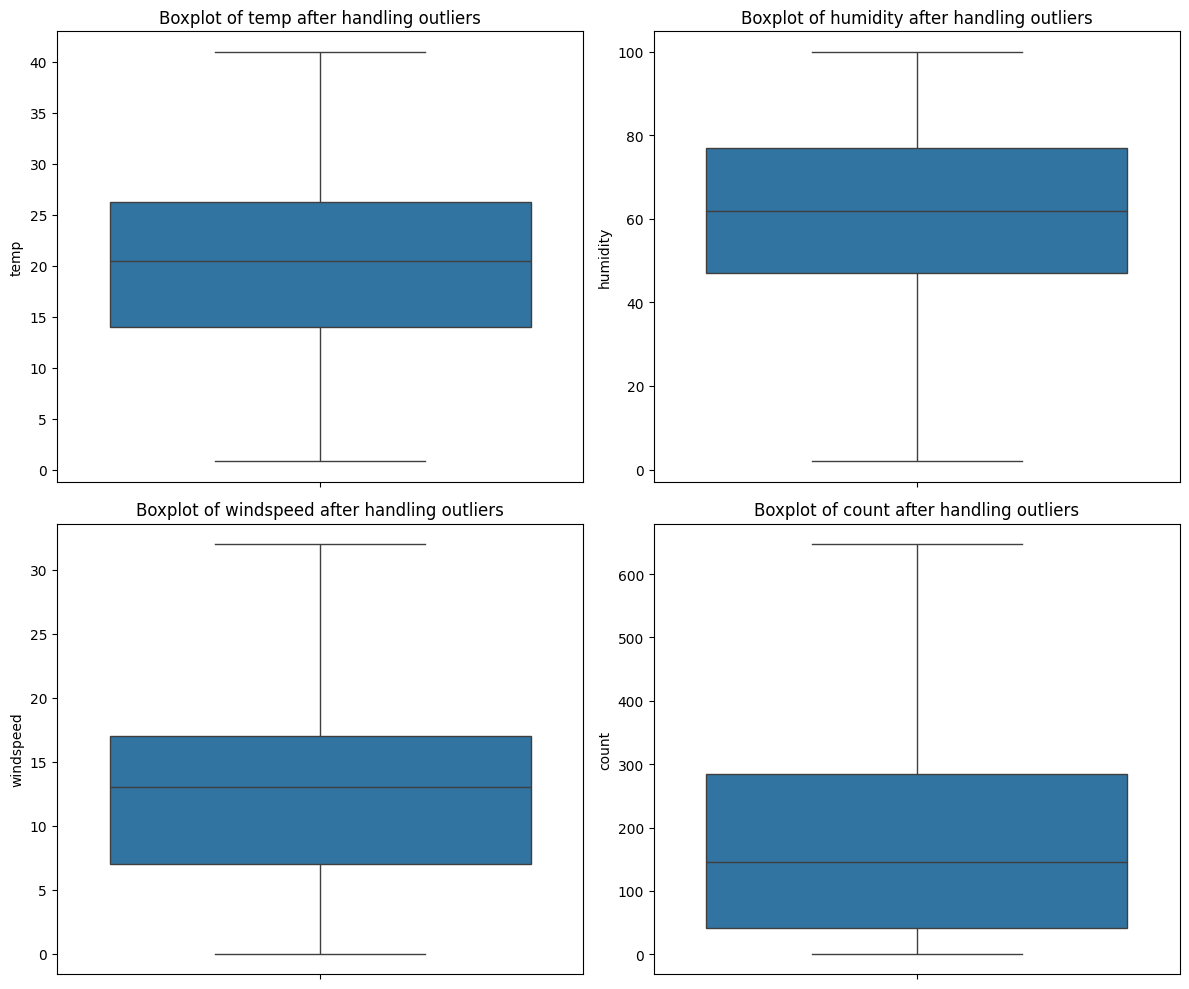

In [26]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(numericColumns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column} after handling outliers')

plt.tight_layout()
plt.show()

#2. Try establishing a Relationship between the Dependent and Independent Variables.
###Hint:
####i. Plot a Correlation Heatmap and draw insights.
####ii. Remove the highly correlated variables, if any.

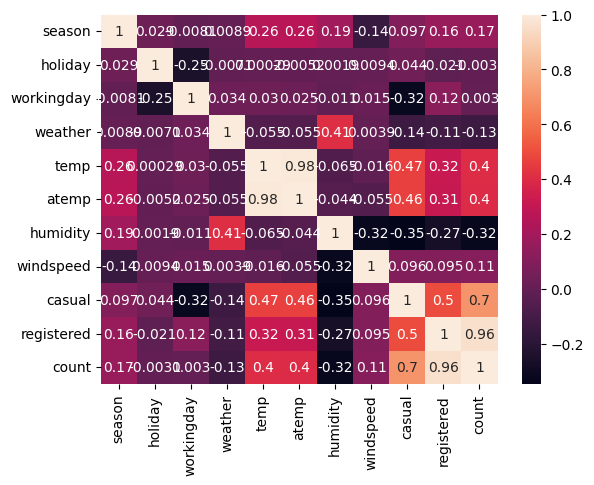

In [27]:
data=data.drop(columns=['datetime','date','Year','Month'])
sns.heatmap(data=data.corr(),annot=True)
correlatedData=data.corr()

#Insight: There is a strong correlation between Casual*Count and Casual&Registered negative relation Ship between season and
# windspeed, humidity with windspeed, casual, Registed and count

#3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?
a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
b. Select an appropriate test -
i. Hint: 2- Sample Independent T-test
c. Set a significance level
i. Hint: alpha=5% is recommended
d. Calculate test Statistics / p-value
e. Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
f. Draw inferences & conclusions from the analysis and provide recommendations.

In [28]:
#Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1) :
#H0= No significance difference between No. of rides between Weekdays and weekends
#H1= There is a significance difference between No. of rides between weekdays and Weekends.
#lets choose 2 sample test.
#Significance Level 0.5
yulu['day of Week']=yulu['datetime'].dt.day_of_week
alpha=0.5

import scipy.stats as stat

weekdays=yulu[yulu['day of Week']<5]
weekends=yulu[yulu['day of Week']>=5]

t_test,p_value=stat.ttest_ind(weekdays['count'],weekends['count'],equal_var=False)
print(f"T Test :{t_test}, P_Value: {p_value}")

if p_value<=alpha:
  print("Reject Null Hypothesis")
  print("There is a significance in rides difference between weekdays and weekends")
else:
  print("Null Hypothesis is correct")
  print("There is no significance difference on rides between weekdays and weekends")


#Insight: Making bikes available during Weekend.
#provide some discounts to encourage users during weekdays.



T Test :1.0589713677293344, P_Value: 0.2896542265218858
Reject Null Hypothesis
There is a significance in rides difference between weekdays and weekends


#4. Check if the demand of bicycles on rent is the same for different Weather conditions?
##a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
##b. Select an appropriate test -
###i. Hint: One-way ANOVA test
##c. Check assumptions of the test
###i. Normality
###Hint:
##1. Use Histogram, Q-Q Plot, Skewness & Kurtosis
##2. Shapiro-Wilk’s test
###ii. Equality Variance
###Hint:
####1. Levene’s test
##iii. Please continue doing the analysis even if some assumptions fail(Levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary.

##d. Set a significance level and Calculate the test Statistics / p-value.
###i. Hint: alpha=5% is recommended
####e. Decide whether to accept or reject the Null Hypothesis.
#####Hint:
#####i. If the p-value is less than or equal to the predetermined level of significance (alpha), we have evidence to reject the null hypothesis.
###ii. If the p-value is greater than the predetermined level of significance (alpha), we do not have sufficient evidence to reject the null hypothesis.
####f. Draw inferences & conclusions from the analysis and provide recommendations.

<ipython-input-29-6a3c4bedba5a>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,len(weathers),i)
<ipython-input-29-6a3c4bedba5a>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,len(weathers),i)
<ipython-input-29-6a3c4bedba5a>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,len(weathers),i)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:280: RuntimeWarning: invalid value encountered in divide
  return (self.sorted_data - self.loc) / self.scale


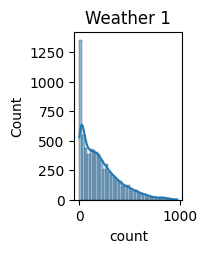

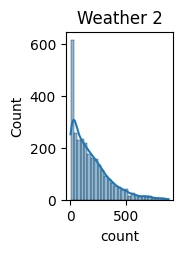

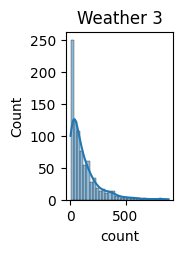

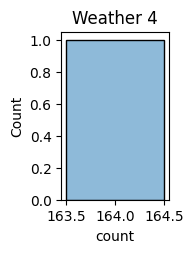

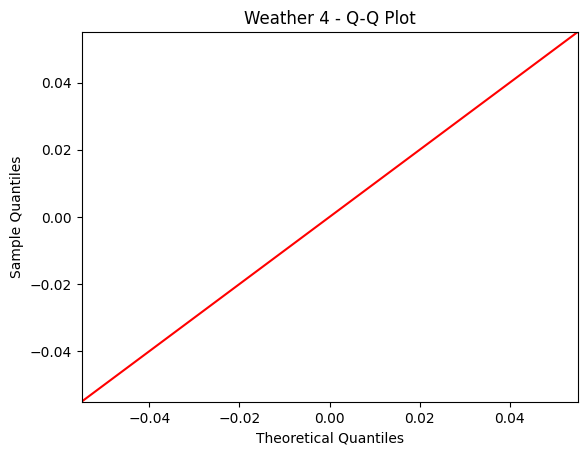

In [29]:
#Null Hypothesis: There is no signigficance difference between on usage of bikes during different seasons
#There is a difference on usage of bikes during different seasons

import statsmodels.api as sm
from statsmodels.formula.api import ols
weathers=yulu['weather'].unique()

for i,condition in enumerate(yulu['weather'].unique(),1):
  plt.subplot(2,len(weathers),i)
  sns.histplot(yulu[yulu['weather']==condition]['count'],kde=True)
  plt.title(f"Weather {condition}")



  sm.qqplot(yulu[yulu['weather'] == condition]['count'], line ='45', fit=True)
  plt.title(f'Weather {condition} - Q-Q Plot')



In [30]:
for condition in weathers:
  if condition!=4:
    stats, p_value = stat.shapiro(yulu[yulu['weather'] == condition]['count'])
    print(f'Weather {condition} - Shapiro-Wilk Test: Statistics={stats}, p-value={p_value}')

Weather 1 - Shapiro-Wilk Test: Statistics=0.8909230828285217, p-value=0.0
Weather 2 - Shapiro-Wilk Test: Statistics=0.8767687082290649, p-value=9.781063280987223e-43
Weather 3 - Shapiro-Wilk Test: Statistics=0.7674332857131958, p-value=3.876090133422781e-33


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [31]:
stats,p_value=stat.levene(yulu[yulu['weather']==1]['count'],yulu[yulu['weather']==2]['count'],yulu[yulu['weather']==3]['count'],yulu[yulu['weather']==4]['count'])

print(stats,p_value)

54.85106195954556 3.504937946833238e-35


In [32]:
annovaModel=ols('count ~ C(weather)', data=yulu).fit()
annovaTable=sm.stats.anova_lm(annovaModel,type=2)

aplph=0.5
if annovaTable['PR(>F)'][0]<=alpha:
  print("Reject the null hypothesis: there is significant difference in the number of bike rental in different weather conditions")
else:
  print("Failt to reject null hypothesis: there is no significant difference in the number of bike rental in different weather conditions")
#annovaTable

Reject the null hypothesis: there is significant difference in the number of bike rental in different weather conditions


#5.Check if the demand of bicycles on rent is the same for different Seasons?
a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
b. Select an appropriate test -
i. Hint: One-way ANOVA test
c. Check assumptions of the test
i. Normality

<ipython-input-35-1a57185eb9de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,len(season),i)
<ipython-input-35-1a57185eb9de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,len(season),i)
<ipython-input-35-1a57185eb9de>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,len(season),i)


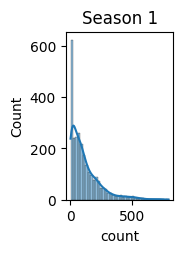

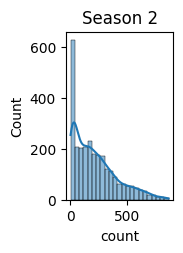

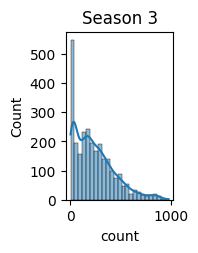

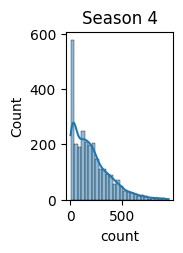

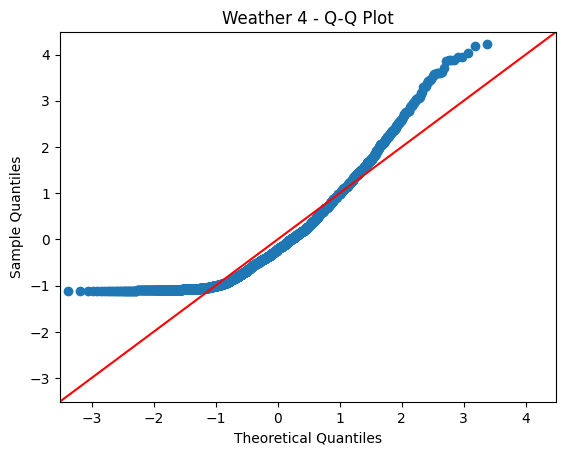

In [35]:
#Null Hypothesis: Demand for Bicycles is same on all Different Seasons
#Alternate Hypothesis: Demand for Bicycles in not same on all different Seasons

season=yulu['season'].unique()

for i,condition in enumerate(season,1):
  plt.subplot(2,len(season),i)
  sns.histplot(yulu[yulu['season']==condition]['count'],kde=True)
  plt.title(f"Season {condition}")



  sm.qqplot(yulu[yulu['season'] == condition]['count'], line ='45', fit=True)
  plt.title(f'Weather {condition} - Q-Q Plot')


In [37]:
for condition in season:

    stats, p_value = stat.shapiro(yulu[yulu['season'] == condition]['count'])
    print(f'Season {condition} - Shapiro-Wilk Test: Statistics={stats}, p-value={p_value}')

Season 1 - Shapiro-Wilk Test: Statistics=0.8087388873100281, p-value=0.0
Season 2 - Shapiro-Wilk Test: Statistics=0.900481641292572, p-value=6.039093315091269e-39
Season 3 - Shapiro-Wilk Test: Statistics=0.9148160815238953, p-value=1.043458045587339e-36
Season 4 - Shapiro-Wilk Test: Statistics=0.8954644799232483, p-value=1.1301682309549298e-39


In [38]:
stats,p_value=stat.levene(yulu[yulu['season']==1]['count'],yulu[yulu['season']==2]['count'],yulu[yulu['season']==3]['count'],yulu[yulu['season']==4]['count'])

#stat.levene(yulu[yulu['weather']==1]['count'],yulu[yulu['weather']==2]['count'],yulu[yulu['weather']==3]['count'],yulu[yulu['weather']==4]['count'])

print(stats,p_value)

187.7706624026276 1.0147116860043298e-118


In [47]:
annovaModel=ols('count ~ C(season)', data=yulu[['season','count']]).fit()
annovaTable=sm.stats.anova_lm(annovaModel,type=2)

aplph=0.5
if annovaTable['PR(>F)'][0]<=alpha:
  print("Reject the null hypothesis: there is significant difference in the number of bike rental in different Seasons")
else:
  print("Fail to reject null hypothesis: there is no significant difference in the number of bike rental in different Seasons")

#Insight: Provide some discounts to use bikes on different seasons.
#

Reject the null hypothesis: there is significant difference in the number of bike rental in different Seasons


#6.Check if the Weather conditions are significantly different during different Seasons?
a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
i. Hint: The values in ‘Weather’ &‘Season’ columns should be treated as
distinct Categories. Encode them accordingly.
b. Select an appropriate test -
i. Hint: Chi-square test
c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns
i. Hint: You can use a Pandas’ CrossTab
d. Set a significance level and Calculate the test Statistics / p-value.
i. Hint: alpha=5% is recommended
e. Decide whether to accept or reject the Null Hypothesis.
Hint:
i. If the p-value is less than or equal to the predetermined level of
significance (alpha), we have evidence to reject the null hypothesis.
ii. If the p-value is greater than the predetermined level of significance
(alpha), we do not have sufficient evidence to reject the null hypothesis.
f. Draw inferences & conclusions from the analysis and provide recommendations.

In [50]:
#Null Hypothesis (H0): Weather conditions are independent of the seasons.i.e. Weather conditions are not significantly different across different seasons.

#Alternate Hypothesis (H1): Weather conditions are dependent on the seasons i.e. Weather conditions are significantly different across different seasons.

contigencyTable=pd.crosstab(yulu['season'],yulu['weather'])
contigencyTable

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [53]:

statistic,pvalue,dof,expected_Freq=stat.chi2_contingency(contigencyTable)
alpha=0.5
if pvalue<alpha:
  print("Reject Null hypothesis - Weather conditions are significantly different in each season")
else:
  print("Don't reject Null hypothesis - Weather conditions are not significantly different in each season")

#Insight: Weather conditions are significantly different in each season so we need to plan various maintainance activities during harsh conditions.
#provide discounts during non-harsh conditions to improve usage of cycles and also run promotions to attract customers.

Reject Null hypothesis - Weather conditions are significantly different in each season
